In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
## Importing the dataset
ins_df = pd.read_csv('insurance.csv')
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
## Data Cleaning


In [5]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
## Data Analysis

In [7]:
ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Columns :
1. sex
2. smoker
3. region

Age Distribution

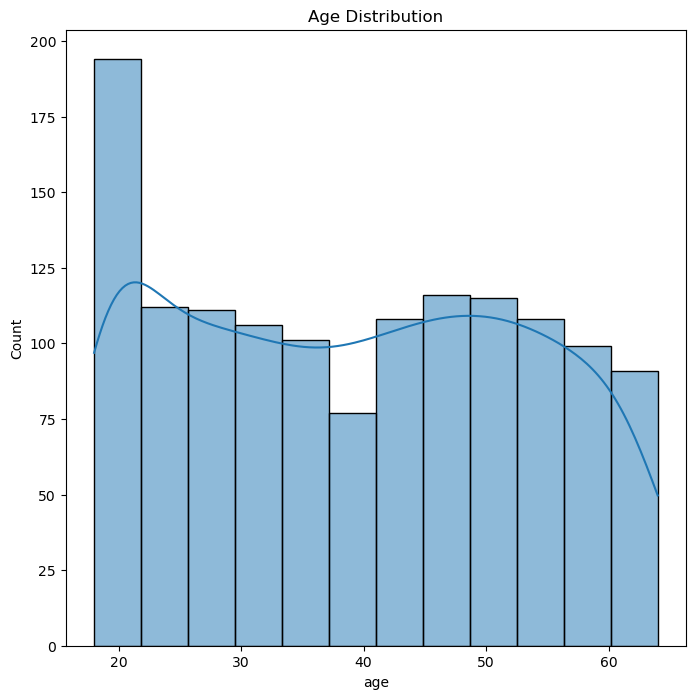

In [11]:
plt.figure(figsize=(8,8))
sns.histplot(ins_df['age'], kde= True)
plt.title('Age Distribution')
plt.show()

<Axes: ylabel='count'>

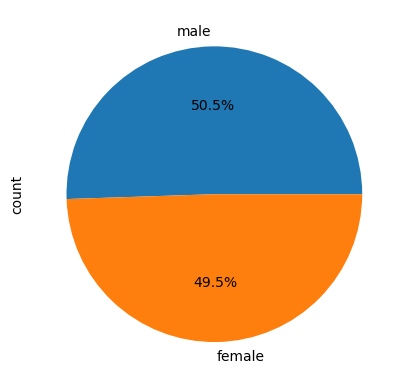

In [12]:
ins_df['sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

<Axes: xlabel='age'>

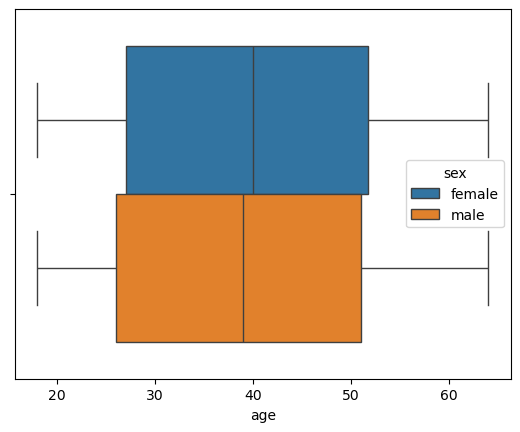

In [13]:
sns.boxplot(data = ins_df, x = 'age', hue = 'sex')

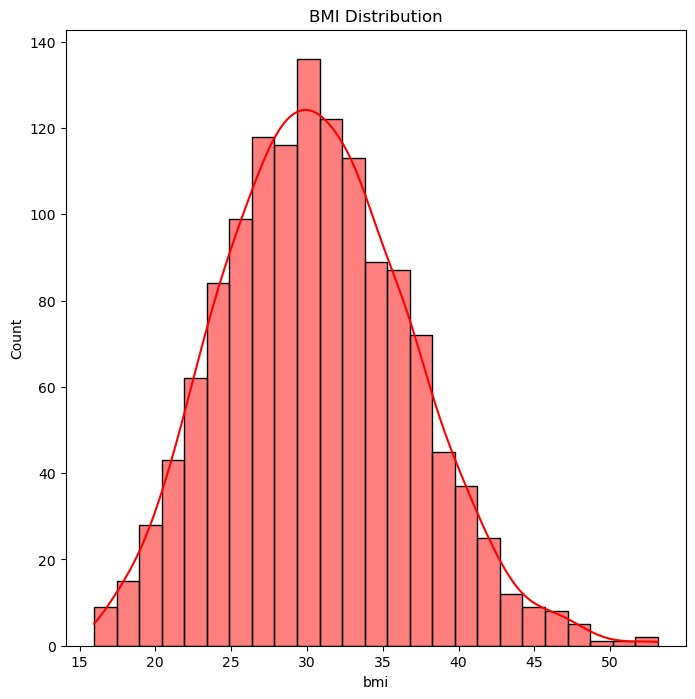

In [14]:
plt.figure(figsize=(8,8))
sns.histplot(ins_df['bmi'], kde= True, color = 'red')
plt.title('BMI Distribution')
plt.show()

<Axes: xlabel='bmi'>

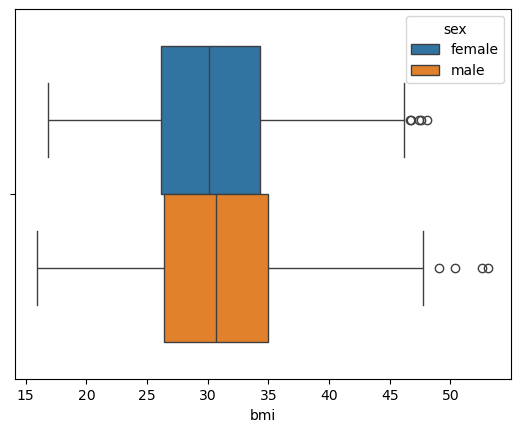

In [15]:
sns.boxplot(data = ins_df, x = 'bmi', hue = 'sex')

<Axes: xlabel='smoker'>

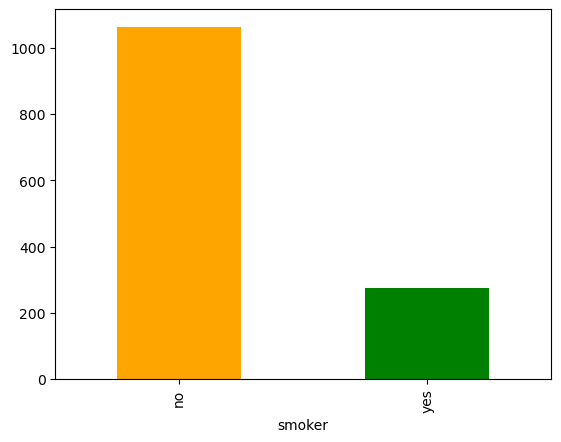

In [16]:
ins_df['smoker'].value_counts().plot(kind = 'bar', color = ['orange', 'green'])

<Axes: xlabel='smoker', ylabel='count'>

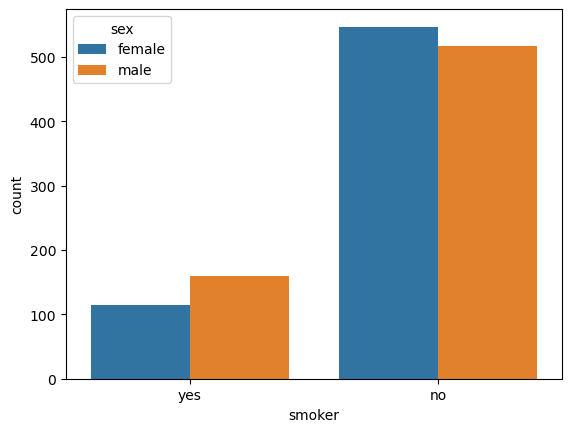

In [17]:
sns.countplot(data = ins_df, x = 'smoker', hue = 'sex')

<Axes: xlabel='children'>

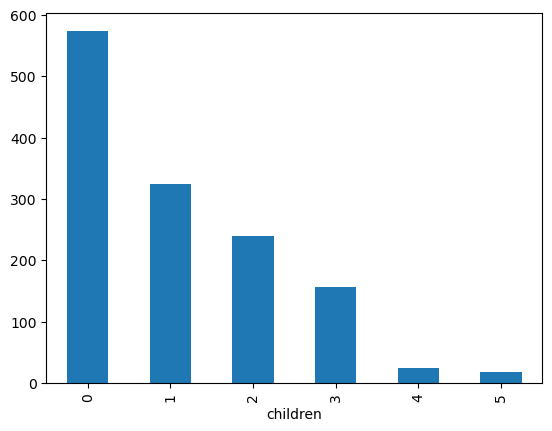

In [18]:
ins_df['children'].value_counts().plot(kind = 'bar')

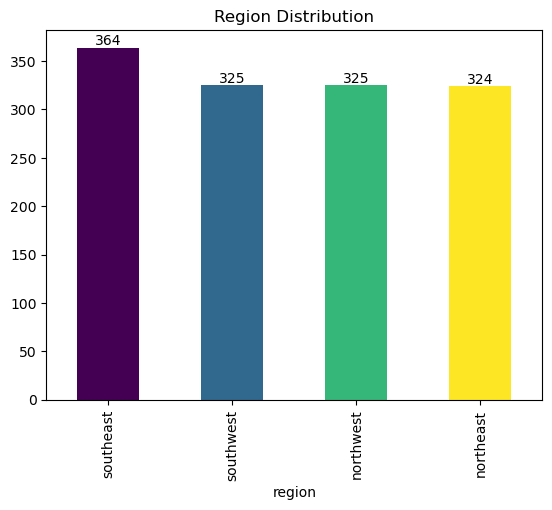

In [19]:
counts = ins_df['region'].value_counts()

# Define a colormap or list of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))

# Plot the bar chart with different colors
ax = counts.plot(kind='bar', color=colors)

# Add labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Add a title (optional)
plt.title('Region Distribution')

# Show the plot
plt.show()

<Figure size 1200x1000 with 0 Axes>

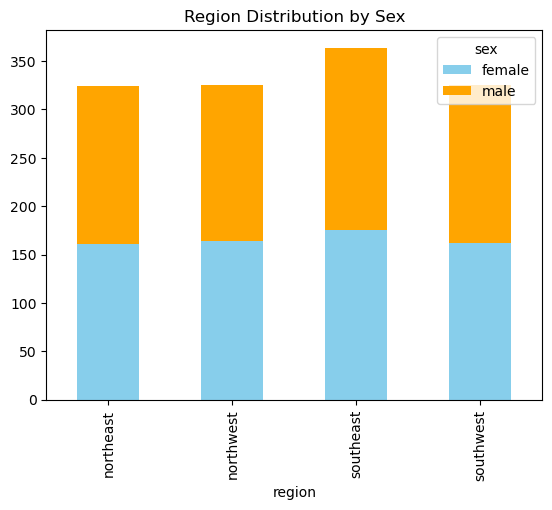

In [20]:
plt.figure(figsize = (12,10))
# Create a crosstab to get the counts
crosstab = pd.crosstab(ins_df['region'], ins_df['sex'])

# Plot a stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# Add a title (optional)
plt.title('Region Distribution by Sex')

# Show the plot
plt.show()


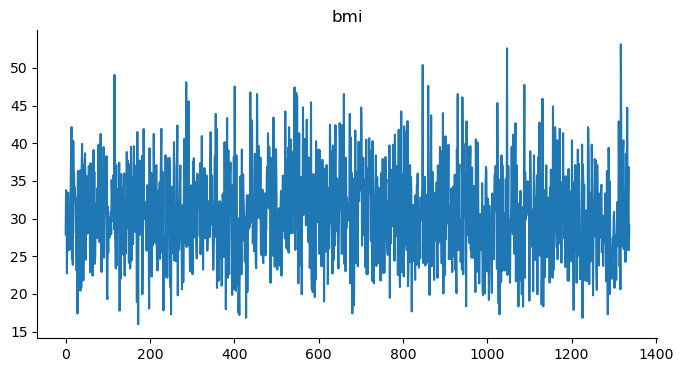

In [21]:
ins_df['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

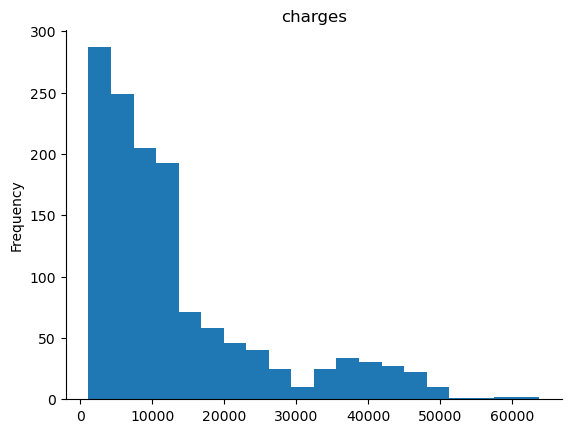

In [22]:
ins_df['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Preparing data for machine learning models

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the column
ins_df['sex'] = le.fit_transform(ins_df['sex'])
ins_df['smoker'] = le.fit_transform(ins_df['smoker'])
ins_df['children'] = le.fit_transform(ins_df['children'])
ins_df['region'] = le.fit_transform(ins_df['region'])


In [26]:
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Splitting the Data into train and test

In [28]:
x = ins_df.drop('charges', axis=1)
y = ins_df['charges']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [30]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


Scalling the data using Standard Scaler

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [33]:
x_train_scaled

array([[ 0.47222651, -1.0246016 , -1.75652513,  0.73433626, -0.50874702,
        -0.45611589],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -1.35325561],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.91119211, -0.50874702,
         0.44102382],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, -0.91119211, -0.50874702,
        -1.35325561],
       [-0.16755139, -1.0246016 ,  2.82086429,  0.73433626,  1.96561348,
         1.33816354],
       [ 1.1120044 ,  0.97598911, -0.10932713, -0.91119211, -0.50874702,
         1.33816354]])

Building Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

In [36]:
score = metrics.r2_score(y_test, y_pred)

In [37]:
score

0.7833463107364538

In [38]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression model
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(x_train, y_train)

# Prediction
y_pred_tree = tree_model.predict(x_test)


In [39]:
score = metrics.r2_score(y_test, y_pred_tree)
score

0.8309769670027721

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')


C:\tmp\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
101 fits failed with the following error:
Traceback (most recent call last):
  File "C:\tmp\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\tmp\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\tmp\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\tmp\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    ra

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Initialize the model with your chosen hyperparameters
forest_model = RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Define the number of folds (e.g., k=5 or k=10)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(forest_model, x, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the average MSE (note that cross_val_score returns negative MSE by default)
average_mse = -scores.mean()

print(f'Average MSE across {k} folds: {average_mse}')


Average MSE across 5 folds: 22579231.87695676


In [43]:
# Train the final model on the entire dataset
forest_model_final = RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

forest_model_final.fit(x, y)
# Make predictions on the test set
y_pred = forest_model_final.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'R-squared on Test Set: {r2_test}')


Mean Squared Error on Test Set: 8011879.383391771
R-squared on Test Set: 0.9483932699069022


Predictive Model like Application

In [45]:
input_data = (22, 0, 26.35,3, 0, 1)
input_data_asnumpy = np.asarray(input_data)
input_data_re = input_data_asnumpy.reshape(1,-1)
pred = forest_model_final.predict(input_data_re)
print(pred)

[7806.95936069]


C:\tmp\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Dump model in to Pickle file

In [ ]:
import picke

pickle